A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [ ]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


# Punto 1

In [ ]:
!pip install helium

In [157]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
from scipy.interpolate import CubicSpline
init_printing() 

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import helium as hell
import pandas as pd
import scipy as sp
from scipy import optimize 
import time

In [135]:
df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json')

In [136]:
df

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


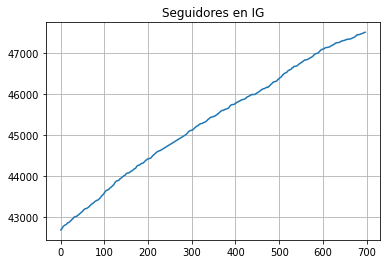

In [137]:
plt.plot(df['hours'],df['followers'])
plt.title('Seguidores en IG')
plt.grid()

In [138]:
def cl(x,a,b,c):
  return a*x**2+b*x+c
y,w=optimize.curve_fit(cl,df['hours'],df['followers'])

In [139]:
a,b,c = y

In [140]:
pd=np.poly1d([a,b,c])
dp=pd.deriv()
tmax=dp.roots[0]
t=np.linspace(0,tmax)

In [141]:
dp

poly1d([-4.87525453e-03,  8.55213784e+00])

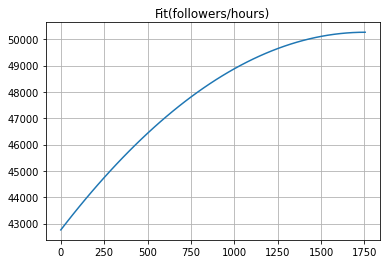

In [142]:
plt.plot(t, cl(t,a,b,c))
plt.title('Fit(followers/hours)')
plt.grid()

In [143]:
g = lambda t: pd[2]*t**2 + pd[1]*t + pd[0]
t = sp.symbols("t")              
g(t)

In [144]:
dvg=sp.diff(g(t),t)
dvg_=sp.lambdify(t, dvg, 'numpy')

In [145]:
dvg

Aceleracion y velocidad

Del la derivada del polinomio se puede ver que la velocidad inicial es aproximadamente 8.55213(followers/hours) y su aceleracion es 0.0048752(followers/hours^2)

In [148]:
from scipy import optimize
root = optimize.newton(dvg_, 2000)
root

In [149]:
g(root)
dias=root/24
dias

Segun el analisis de los datos anteriores la fecha aproximada del alcance del maximo de seguidores es /10/17/2021

# Punto 2

In [153]:
##1
def simp(f,a,b,n):
    s0 = f(a)+f(b); h = (b-a)/n
    s1 = s2 = 0 
    for i in range(1,n):
        if i%2 == 0: s2 += f(a+i*h) 
        else: s1 += f(a+i*h)
    return (s0+4*s1+2*s2)*h/3

f = lambda fi: 1/((1-(np.sin(x/2))**2*(np.sin(fi))**2))**(1/2)
x = np.linspace(0,np.pi/2,15)
#x = 5*np.pi/180

(2/np.pi)*simp(f,0,np.pi/2,100)
#*2*np.pi*np.sqrt(1/9.8)

array([1.        , 1.00078737, 1.0031563 , 1.0071275 , 1.012736  ,
       1.02003213, 1.02908279, 1.03997334, 1.05280999, 1.06772306,
       1.08487115, 1.10444671, 1.12668327, 1.15186517, 1.1803406 ])

In [160]:
##2

df = pd.DataFrame()
df['a (Grados)'] = x*180/np.pi
df['a (Radianes)'] = x
df['$T/T_0$'] = (2/np.pi)*simp(f,0,np.pi/2,100)

df

,a (Grados),a (Radianes),$T/T_0$
0,0.000000,0.000000,1.000000
1,6.428571,0.112200,1.000787
2,12.857143,0.224399,1.003156
3,19.285714,0.336599,1.007127
4,25.714286,0.448799,1.012736
5,32.142857,0.560999,1.020032
6,38.571429,0.673198,1.029083
7,45.000000,0.785398,1.039973
8,51.428571,0.897598,1.052810
9,57.857143,1.009798,1.067723


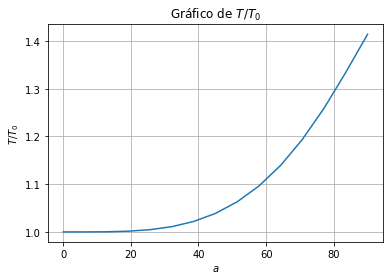

In [162]:
##3

plt.title('Gráfico de $T/T_0$')
plt.plot(x*180/np.pi,f(x))
plt.xlabel('$a$')
plt.ylabel('$T/T_0$')
plt.grid()
plt.show()

##4
# Cuando Alfa

Cuando alfa toma valores cercanos a cero la integral descrita en la
ecuación toma el valor de 1, independientemente del valor de la variable fi.
por lo que con ángulos muy pequeños el Cociente $T/T_0$
es aproximadamente 1, el Periodo no depende de la amplitud del péndulo
sino que únicamente de la longitud del péndulo y el valor de $g$.
